In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [8]:
# create a dataframe to store results
mf_rbf_gpr_results = pd.DataFrame()
# use a for loop to read all csv files

input = pd.read_csv("../mf_rbf_kriging/exp_mf_rbf_input.csv", index_col=0)
output = pd.read_csv("../mf_rbf_kriging/exp_mf_rbf_output.csv", index_col=0)
# merge input and output dataframes
df = pd.merge(input, output, left_index=True, right_index=True)
mf_rbf_gpr_results = pd.concat([mf_rbf_gpr_results, df])

# remove the results of problem "mf_Himmelblau"
mf_rbf_gpr_results = mf_rbf_gpr_results[
    mf_rbf_gpr_results["problem"] != "mf_Himmelblau"
]

# load the results kriging
kriging_results = pd.DataFrame()
input = pd.read_csv("../kriging/exp_kriging_input.csv", index_col=0)
output = pd.read_csv("../kriging/exp_kriging_output.csv", index_col=0)
# merge input and output dataframes
df = pd.merge(input, output, left_index=True, right_index=True)
kriging_results = pd.concat([kriging_results, df])

# delect the results of problem "Himmelblau"
kriging_results = kriging_results[kriging_results["problem"] != "mf_Himmelblau"]

In [9]:
# select the rows where num_lf is 100
mf_rbf_gpr_results = mf_rbf_gpr_results[mf_rbf_gpr_results["num_lf"] == 100]
mf_rbf_gpr_results

,method,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
150,mf_rbf,2,100,mf_Bohachevsky,1,finished,1.244776,0.413288,0.591911,1.685736
151,mf_rbf,4,100,mf_Bohachevsky,1,finished,1.033538,0.272001,0.823237,0.773493
152,mf_rbf,6,100,mf_Bohachevsky,1,finished,0.227152,0.059479,0.991548,1.402390
153,mf_rbf,8,100,mf_Bohachevsky,1,finished,0.165427,0.047133,0.994692,2.409916
154,mf_rbf,10,100,mf_Bohachevsky,1,finished,0.063972,0.020610,0.998985,1.548617
...,...,...,...,...,...,...,...,...,...,...
9955,mf_rbf,12,100,mf_Sixhump,5,finished,0.557443,0.088972,0.995780,2.667922
9956,mf_rbf,14,100,mf_Sixhump,5,finished,0.034937,0.005962,0.999981,2.094870
9957,mf_rbf,16,100,mf_Sixhump,5,finished,0.064468,0.007356,0.999971,3.244398
9958,mf_rbf,18,100,mf_Sixhump,5,finished,0.087888,0.014693,0.999885,2.839946


In [12]:
# select the rows of kriging results where num_sample is less than or equal 20
kriging_results = kriging_results[kriging_results["num_sample"] <= 20]
kriging_results

,num_sample,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
0,2,mf_Bohachevsky,1,finished,1.247789,0.609733,0.111765,0.138421
1,4,mf_Bohachevsky,1,finished,0.600594,0.171081,0.930071,0.224258
2,6,mf_Bohachevsky,1,finished,0.261412,0.055562,0.992624,0.559759
3,8,mf_Bohachevsky,1,finished,0.101834,0.024829,0.998527,0.429590
4,10,mf_Bohachevsky,1,finished,0.048610,0.016994,0.999310,0.672700
...,...,...,...,...,...,...,...,...
985,12,mf_Sixhump,5,finished,0.518212,0.150547,0.987918,0.652149
986,14,mf_Sixhump,5,finished,0.956846,0.205843,0.977413,0.559166
987,16,mf_Sixhump,5,finished,0.503349,0.146275,0.988594,1.171991
988,18,mf_Sixhump,5,finished,1.371177,0.328756,0.942385,1.225043


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: Could not interpret value `mean_log_likelihood` for `y`. An entry with this name does not appear in `data`.

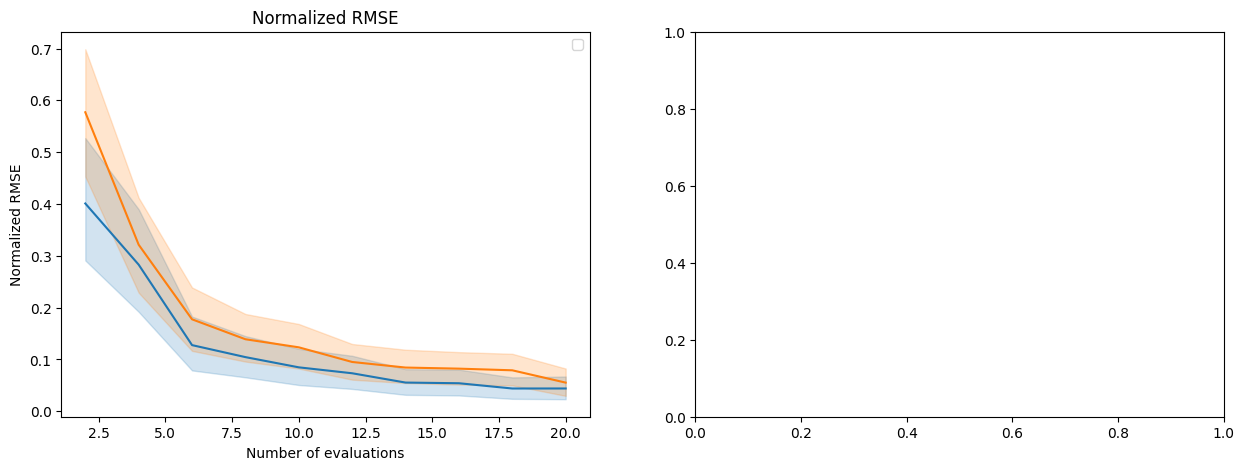

In [13]:
# plot the results of the mf_rbf_lf_200 and gpr_rbf_booth experiments using number of evaluations as x and normalized rmse and log likelihood as y
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="normalized_rmse",
    ax=ax[0],
)
sns.lineplot(
    data=kriging_results,
    x="num_sample",
    y="normalized_rmse",
    ax=ax[0],
)
ax[0].set_title("Normalized RMSE")
ax[0].set_xlabel("Number of evaluations")
ax[0].set_ylabel("Normalized RMSE")
ax[0].legend()
# sns.lineplot(data=mf_rbf_gpr_results, x="num_hf", y="mf_mean_log_likelihood", hue="noise_std", palette='colorblind', marker='^', legend='full',
#              ax=ax[1])
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="log_likelihood",
    palette="colorblind",
    marker="s",
    legend="full",
    ax=ax[1],
)
ax[1].set_title("Log Likelihood")

/home/jiaxiangyi/anaconda3/envs/mfpml_env/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jiaxiangyi/anaconda3/envs/mfpml_env/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jiaxiangyi/anaconda3/envs/mfpml_env/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

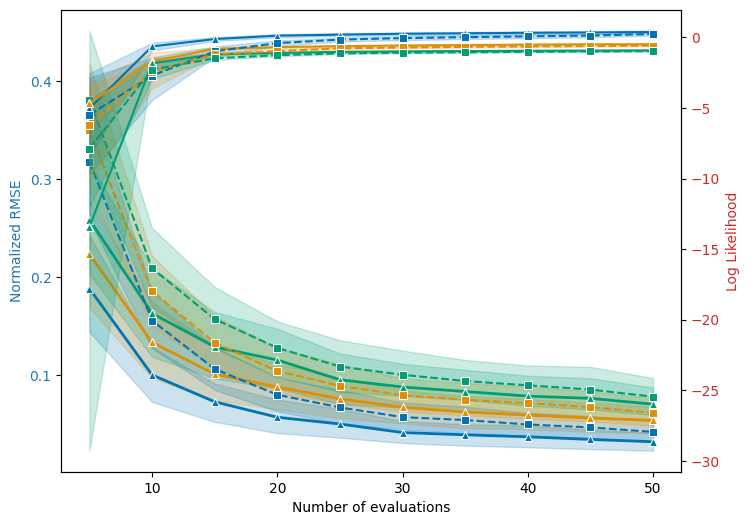

In [5]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot normalized RMSE on the left y-axis
color = "tab:blue"
ax1.set_xlabel("Number of evaluations")
ax1.set_ylabel("Normalized RMSE", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    palette="colorblind",
    marker="^",
    legend="full",
    linewidth=2,
    y="mf_normalized_rmse",
    hue="noise_std",
    ax=ax1,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_normalized_rmse",
    ax=ax1,
)
ax1.tick_params(axis="y", labelcolor=color)

ax1.get_legend().remove()

# Create another y-axis for log likelihood
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Log Likelihood", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="^",
    legend="full",
    y="mf_mean_log_likelihood",
    ax=ax2,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_mean_log_likelihood",
    ax=ax2,
)
ax2.tick_params(axis="y", labelcolor=color)
ax2.get_legend().remove()
# set the legend scale of the right y-axis into log scale
# ax2.set_yscale('log')

# add legend

plt.show()

In [15]:
# problem information
problem_sets = [
    "Bohachevsky",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]
dimensions = [2, 2, 8, 2, 3, 6, 4, 4, 2]
r2 = [0.857, 0.925, 1.000, 0.997, -0.196, 0.712, 0.994, 1.0000, 0.833]

# # set r2 to have 3 decimal places
# r2 = [round(i, 3) for i in r2]
# print(r2)

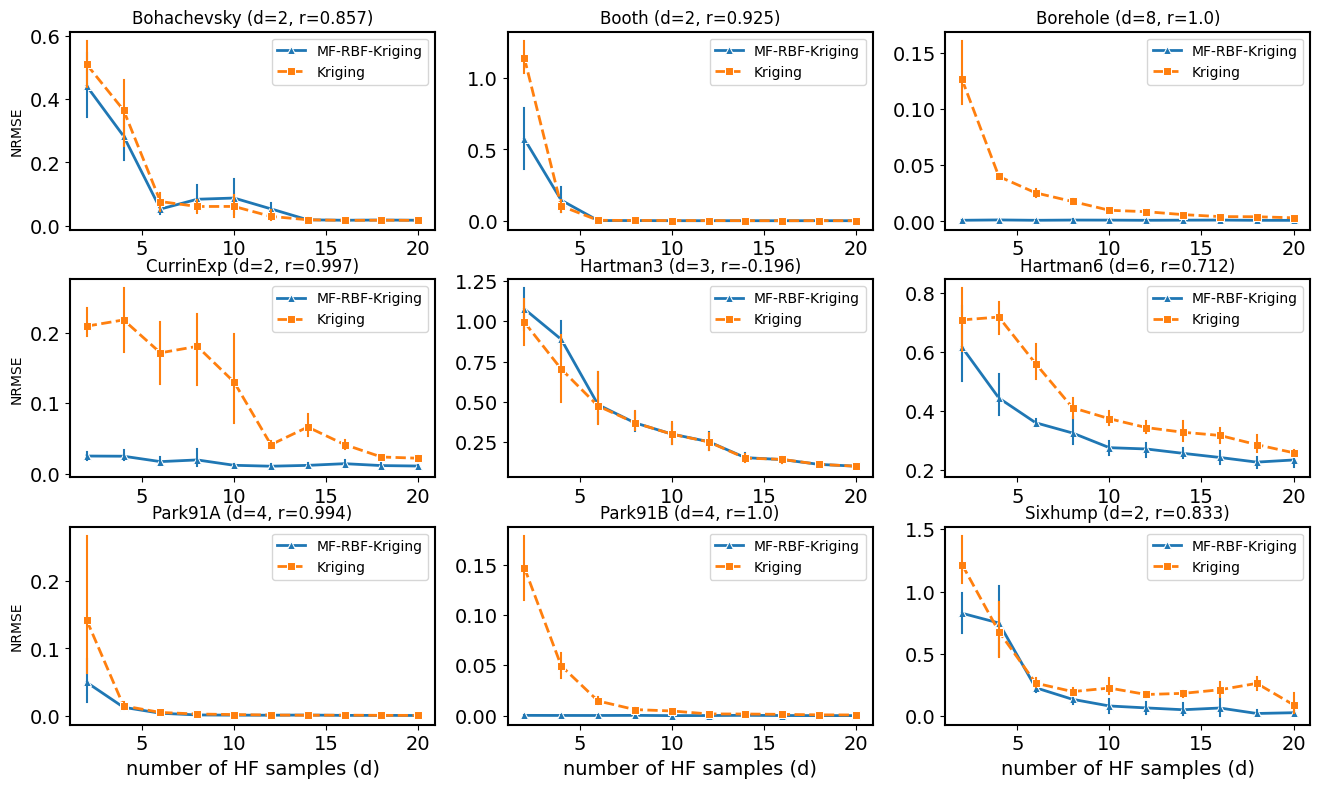

In [23]:
problem_set = mf_rbf_gpr_results["problem"].unique()

font_size = 14
fig, ax = plt.subplots(3, 3, figsize=(16, 9))
# for problem in problem_set:

for ii in range(3):
    for jj in range(3):
        problem = problem_set[ii * 3 + jj]
        mf_result = mf_rbf_gpr_results[(mf_rbf_gpr_results["problem"] == problem)]
        sf_result = kriging_results[(kriging_results["problem"] == problem)]
        # Plot normalized RMSE on the left y-axis
        if ii == 2:
            ax[ii, jj].set_xlabel("number of HF samples (d)", fontsize=font_size)
        else:
            ax[ii, jj].set_xlabel(" ")
        if jj == 0:
            ax[ii, jj].set_ylabel("NRMSE")
        else:
            ax[ii, jj].set_ylabel(
                " ",
            )
        sns.lineplot(
            data=mf_result,
            x="num_hf",
            marker="^",
            legend="full",
            linewidth=2,
            y="normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
            label="MF-RBF-Kriging",
        )
        sns.lineplot(
            data=sf_result,
            x="num_sample",
            marker="s",
            legend="full",
            linewidth=2,
            linestyle="dashed",
            y="normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
            label="Kriging",
        )
        ax[ii, jj].tick_params(axis="y")

        # set the font of axis and y-axis precision
        ax[ii, jj].tick_params(axis="both", which="major", labelsize=font_size)
        # set the line width of the axis
        for axis in ["top", "bottom", "left", "right"]:
            ax[ii, jj].spines[axis].set_linewidth(1.5)

        # get title info
        title = (
            problem_sets[ii * 3 + jj]
            + " (d="
            + str(dimensions[ii * 3 + jj])
            + ", r="
            + str(r2[ii * 3 + jj])
            + ")"
        )
        ax[ii, jj].set_title(title)
        # set space between subplots
        plt.subplots_adjust(hspace=0.25)
plt.savefig("mf_rbf_kriging_correlation_influence.png", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_correlation_influence.pdf", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_correlation_influence.svg", dpi=300, bbox_inches="tight")
plt.show()